In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import rcParams

In [2]:
# Результаты регрессии сильно варьируются от запуска к запуску, поэтому результат надо усреднять. 
# У среднего хотя бы пара разрядов после запятой не пляшет
def run_many(features, target, num_runs=1000):
    
    result = 0
    max_score = -100
    min_score = 1
    
    for i in range(num_runs):
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
        model = LinearRegression()
        model.fit(X_train, y_train)
        cur_score = model.score(X_test, y_test)
        result += cur_score
        if cur_score > max_score:
            max_score = cur_score
        if cur_score < min_score:
            min_score = cur_score
            
    result = result / num_runs
        
    return result, max_score, min_score

In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


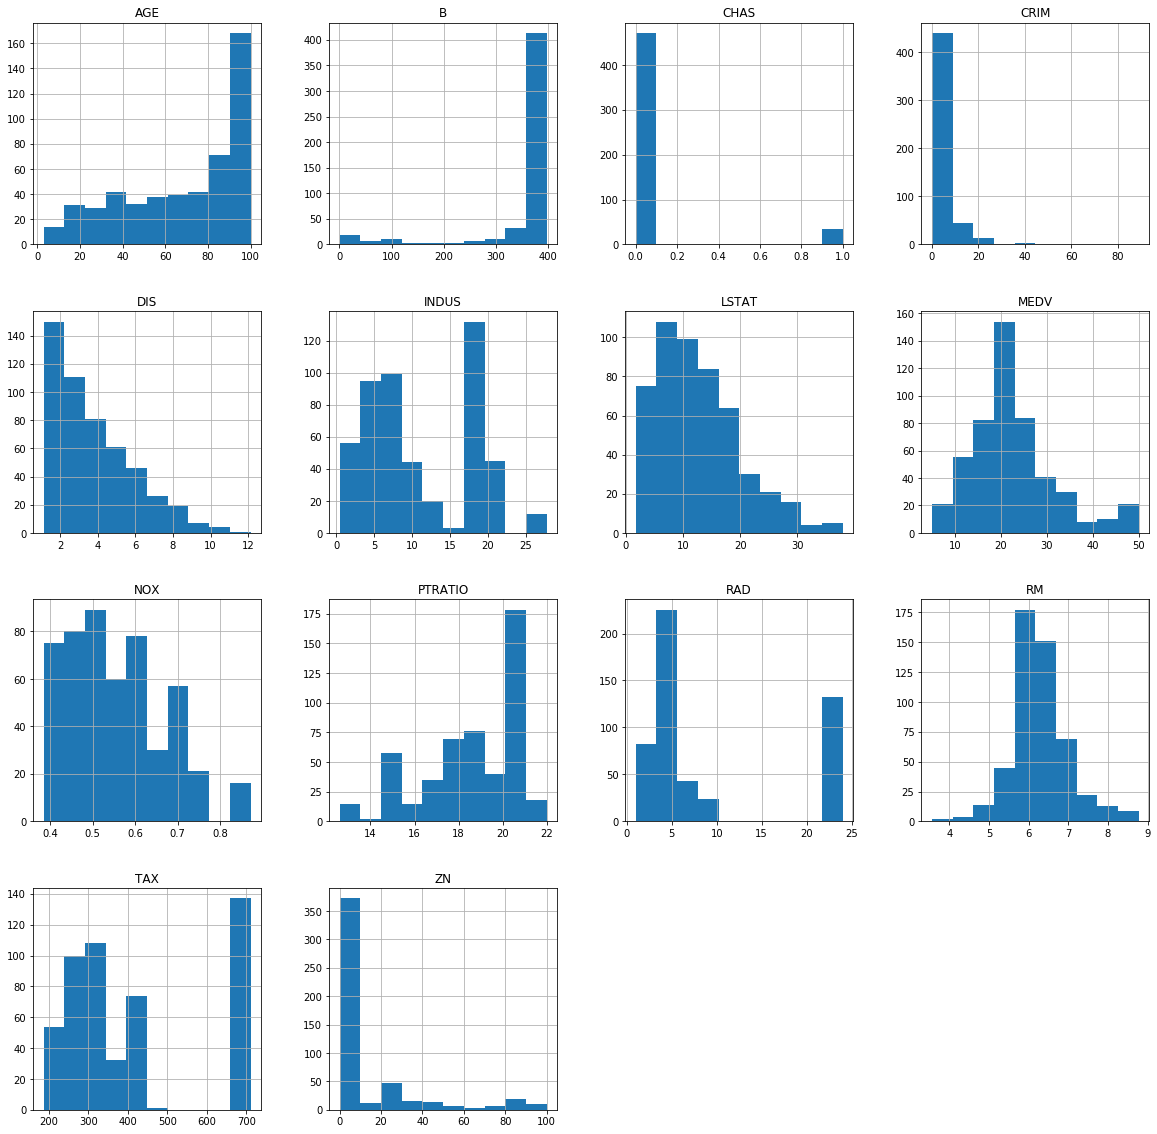

In [8]:
ax = data.hist(figsize=(20,20))

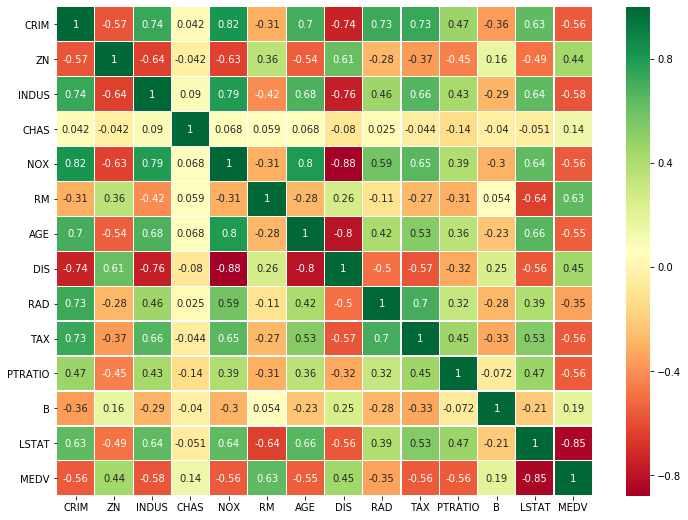

In [9]:
rcParams['figure.figsize'] = 12,9

ax = sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=0.2, cmap='RdYlGn')

In [10]:
# Let's start from simple thing - LSTAT is almost the same as MEDV :)
# X_train, X_test, y_train, y_test = train_test_split(np.array(data['LSTAT']).reshape(-1,1), data['MEDV'], test_size=0.3)

# model = LinearRegression()
# model.fit(X_train, y_train)

run_many(np.array(data['LSTAT']).reshape(-1,1), data['MEDV'])

(0.5341699762370503, 0.6361531699395002, 0.39195633381682354)

Первую оценку - 0.534 получили без какого-либо анализа. Минимальная оценка - 0.3, максимальная - 0.64. Пробуем улучшить. 

Цена дома коррелирует со следующими параметрами (corr>0.5):
 - LSTAT: -0.85
 - RM: 0.63
 - INDUS: -0.58
 - TAX, PTRATIO, NOX, CRIM: -0.56
 - AGE: -0.55
    
При этом, NOX & CRIM обладают вымоким коэффициентом корреляции 0.82, поэтому в модель нужно ставить только один из признаков. Слегка странно видеть корреляцию между преступностью и экологией, но при здравом размышлении - логично :) Бедные районы находятся ближе к большим дорогам и фабрикам

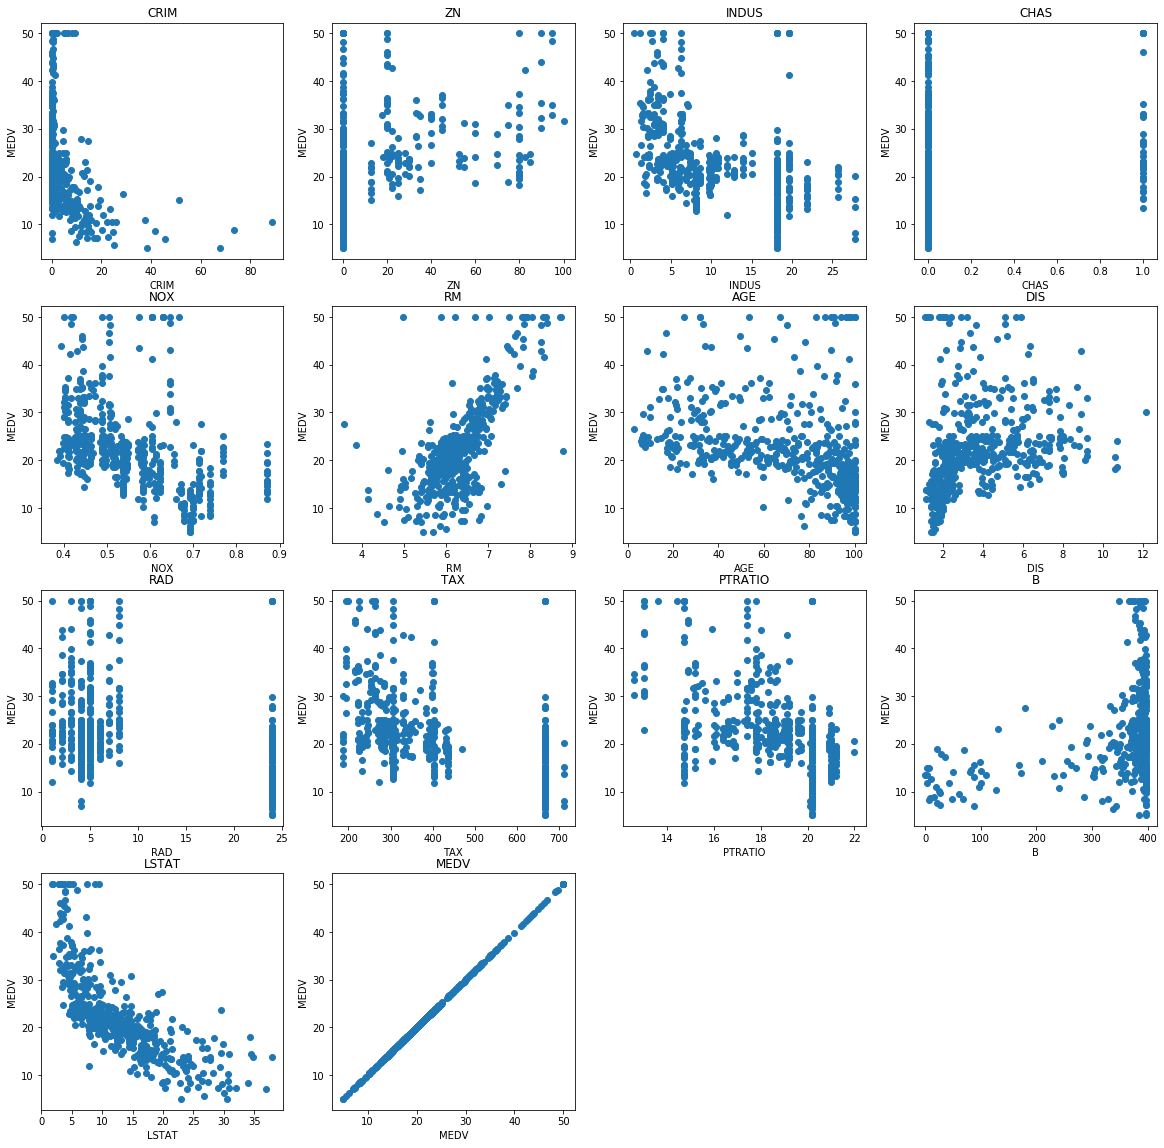

In [11]:
# Some graphs
plt.figure(figsize=(20, 20))

features = data.columns
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(4, 4, i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Зависимость от RM похожа на линейную. Зависимость от LSTAT похожа на корень (не обязательно квадратный... проверим позже)

В колонке цен есть много значений 50 - очень похоже на ограничение сверху. Несмотря на то, что в оригинальном наборе данных про это не сказано ни слова, многие исследователи считают, что эти значения надо удалять

In [12]:
print(f'MEDV == 50 count: {len(data[data["MEDV"]==50])}')
print(f'40 <= MEDV < 50 count: {len(data[(data["MEDV"]<50) & (data["MEDV"]>=40)])}')

MEDV == 50 count: 16
40 <= MEDV < 50 count: 15


Значений 50 больше, чем в диапазоне 40-50. удаляем

In [13]:
data = data.drop(data[data['MEDV']==50].index)

Еще один метод определения важных параметров.

In [14]:
#Automatic feature selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = data.iloc[:,0:13]  #independent columns
y = np.array(data.iloc[:,-1])    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features



      Specs       Score
12    LSTAT  666.627892
5        RM  435.309814
2     INDUS  274.507475
9       TAX  237.855059
4       NOX  185.148836
10  PTRATIO  179.568192
6       AGE  156.620474
8       RAD  143.190234
0      CRIM  123.991786
1        ZN   95.527784


В итоговой модели я постепенно увеличивал кол-во параметров, добавляя их по старшинству из этого списка. NOX сильно коррелирует с INDUS, добавление его в модель не улучшит результат

In [15]:
#Let's try to find optimal power for LSTAT

for i in range(1,10):
    data['LSTAT_sqrt'] = data['LSTAT']**(1.0/i)
    X_train, X_test, y_train, y_test = train_test_split(np.array(data['LSTAT_sqrt']).reshape(-1,1), data['MEDV'], test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f'For root power {i} model score is {score}')

For root power 1 model score is 0.6120187506787342
For root power 2 model score is 0.597040691198151
For root power 3 model score is 0.6527375496613596
For root power 4 model score is 0.6413292388360189
For root power 5 model score is 0.6686754485397275
For root power 6 model score is 0.6220858926771944
For root power 7 model score is 0.6897218056815377
For root power 8 model score is 0.6978525976878964
For root power 9 model score is 0.6722949002126402


Результаты выполнения очень сильно варьируются... Попробуем с функцией из начала ноутбука

In [16]:
# results = np.zeros(19)

# for j in range (1000):
#     for i in range(1,20):
#         data['LSTAT_sqrt'] = data['LSTAT']**(1.0/i)
#         X_train, X_test, y_train, y_test = train_test_split(np.array(data['LSTAT_sqrt']).reshape(-1,1), data['MEDV'], test_size=0.3)
#         model = LinearRegression()
#         model.fit(X_train, y_train)
#         results[i-1] += model.score(X_test, y_test)

# for i, cur in enumerate(results):
#     print(f'For root power {i+1} model score is {cur}')
# print(results)

for i in range(1,20):
    data['LSTAT_sqrt'] = data['LSTAT']**(1.0/i)
    score, max_score, min_score = run_many(np.array(data['LSTAT_sqrt']).reshape(-1,1), data['MEDV'])
    
    print(f'For root power {i} model score is {score}, max_score is: {max_score}, min_score is: {min_score}')

For root power 1 model score is 0.5678148230939886, max_score is: 0.6891366691365921, min_score is: 0.38263463605715375
For root power 2 model score is 0.6315553112319988, max_score is: 0.7381974784536847, min_score is: 0.47090828558141196
For root power 3 model score is 0.6444437330252855, max_score is: 0.7488910329109086, min_score is: 0.481697866205266
For root power 4 model score is 0.6542674801539533, max_score is: 0.7389507831311972, min_score is: 0.48560048694624686
For root power 5 model score is 0.655713253879524, max_score is: 0.7378527545159774, min_score is: 0.5031626903714981
For root power 6 model score is 0.6558887529986024, max_score is: 0.7678554039819804, min_score is: 0.5448578125014463
For root power 7 model score is 0.6593292465504763, max_score is: 0.7639266584876535, min_score is: 0.48793582647277434
For root power 8 model score is 0.659214316951234, max_score is: 0.7596699894614665, min_score is: 0.4847907781942975
For root power 9 model score is 0.6621904389795

Результаты странные. Пришла идея - а если это 1/х^y?

In [17]:
#After several tries
data['LSTAT_sqrt'] = 1/(data['LSTAT']**(1/3))

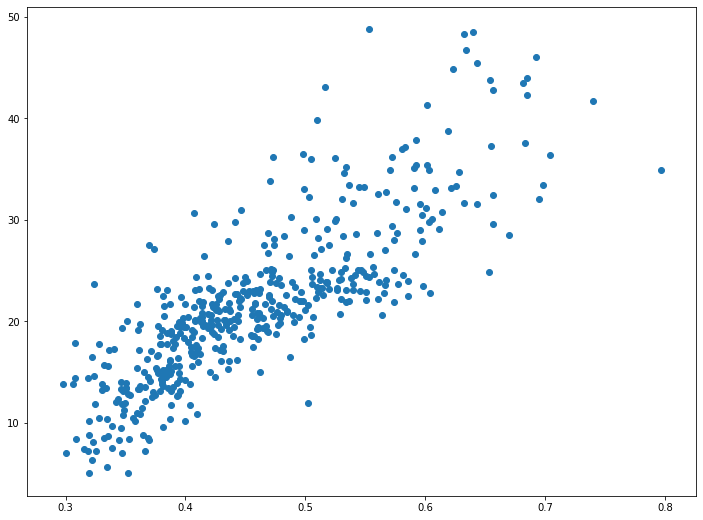

In [18]:
plt.scatter(data['LSTAT_sqrt'], data['MEDV'], marker='o')
plt.show()

In [19]:
# result = 0
# for i in range(1000):
#     X_train, X_test, y_train, y_test = train_test_split(np.array(data['LSTAT_sqrt']).reshape(-1,1), data['MEDV'], test_size=0.3)
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     result += model.score(X_test, y_test)

run_many(np.array(data['LSTAT_sqrt']).reshape(-1,1), data['MEDV'])

(0.6676967510021999, 0.7781395227201802, 0.49893095220418704)

Использование преобразования позволило увеличить оценку примерно на 0.13

Попробуем построить модель на основе двух свойств - $\frac{1}{\sqrt[3]{LSTAT}}$ & RM

In [20]:
# result = 0
# for i in range(1000):
#     X_train, X_test, y_train, y_test = train_test_split(np.array(data[['LSTAT_sqrt', 'RM']]), data['MEDV'], test_size=0.3)
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     result += model.score(X_test, y_test)
#     
# result

run_many(data[['LSTAT_sqrt', 'RM']], data['MEDV'])

(0.7011030365079172, 0.7862315895589738, 0.5132183662644689)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data[['LSTAT_sqrt', 'RM']]), data['MEDV'], test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.6781981550401784
RMSE: 	 4.358458434987765
MAE: 	 3.3562465133037667


0.7 - лучший результат, которого я достиг при использовании двух переменных. Ошибка предсказания цены составляет примерно 15-20 процентов от среднего значения. Не знаю, насколько это хорошо, но лучше чем в лекциях про Лос-Анжелес))

Ниже - лучший результат, который я получил, играясь с различными комбинациями столбцов. 0.77 - весьма неплохо, ИМХО :)

In [29]:
run_many(data[['LSTAT_sqrt', 'RM', 'INDUS', 'TAX', 'PTRATIO', 'CRIM', 'RAD', 'B']], data['MEDV'])

(0.7730523086470695, 0.8450912081904205, 0.6062026900864168)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(np.array(
    data[['LSTAT_sqrt', 'RM', 'INDUS', 'TAX', 'PTRATIO', 'CRIM', 'RAD', 'B']]), data['MEDV'], test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7722092132983094
RMSE: 	 3.52345140816968
MAE: 	 2.556607731224676


Ошибка стала меньше

Преобразования, подобного тому, что я сделал для LSTAT, я не смог подобрать... Все же время на учебную задачу должно быть в разумных пределах :)